In [1]:
import pandas as pd 
import numpy as np

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
sub_df = pd.read_csv('sample_submission.csv')

In [3]:
train_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0


In [4]:
train_df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000
mean,7651.500000,41.417708,0.049726,0.023327,89.039853,28.112721,0.041296
std,4418.028595,21.444673,0.217384,0.150946,25.476102,6.722315,0.198981
min,0.000000,0.080000,0.000000,0.000000,55.220000,10.300000,0.000000
25%,3825.750000,26.000000,0.000000,0.000000,74.900000,23.500000,0.000000
50%,7651.500000,43.000000,0.000000,0.000000,85.120000,27.600000,0.000000
75%,11477.250000,57.000000,0.000000,0.000000,96.980000,32.000000,0.000000
max,15303.000000,82.000000,1.000000,1.000000,267.600000,80.100000,1.000000


In [5]:
train_df.duplicated().sum()

0

In [6]:
# Data Cleaning

In [7]:
sorted(train_df['age'].unique().tolist())[0:12]

[0.08, 0.16, 0.24, 0.32, 0.4, 0.48, 0.56, 0.64, 0.68, 0.72, 0.8, 0.88]

In [8]:
train_df['age'] = np.ceil(train_df['age'])
test_df['age'] = np.ceil(test_df['age'])

In [9]:
train_df['gender'].value_counts()

gender
Female    9446
Male      5857
Other        1
Name: count, dtype: int64

In [10]:
train_df.drop(train_df[train_df['gender'] == 'Other'].index, inplace = True)
test_df.drop(test_df[test_df['gender'] == 'Other'].index, inplace = True)

In [11]:
# EDA
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp
sns.set_style('darkgrid')

In [12]:
plot_color = ['#008080', 'black']
sns.set_palette(['#008080', 'black'])

In [13]:
# Filtering the data for strock and non-strock
no_stroke = train_df[train_df['stroke'] == 0]
stroke = train_df[train_df['stroke'] == 1]

In [14]:
# Univariate Analysis
stroke_count = train_df['stroke'].value_counts()
stroke_count

stroke
0    14671
1      632
Name: count, dtype: int64

In [15]:
import kaleido
fig = px.pie(
    stroke_count, values=stroke_count.values, names=['No', 'Yes'], 
    title = 'Proportion of Stroke Cases', 
    color_discrete_sequence=plot_color)

fig.update_layout(legend_title_text = 'Stroke Status', title_x=0.3, title_y = 0.95)
fig.show()

In [16]:
# Bivaridate Analysis
from plotly import subplots as sp
import plotly.graph_objects as go
import plotly.express as px

def custom_histogram(columns: str, titles: list) -> go.Figure:
    # Create subplot structure
    fig = sp.make_subplots(rows=1, cols=2, subplot_titles=['No Stroke', 'Yes Stroke'])
    
    # Create histograms using px.histogram
    histogram_no_stroke = px.histogram(no_stroke, x=columns, color_discrete_sequence=['#008080'])
    histogram_stroke = px.histogram(stroke, x=columns, color_discrete_sequence=['Black'])
    
    # Add traces to the subplot
    fig.add_trace(histogram_no_stroke.data[0], row=1, col=1)
    fig.add_trace(histogram_stroke.data[0], row=1, col=2)
    
    # Update layout
    fig.update_layout(
        title=titles[0],  # Overall title
        title_x=0.5,  # Center the title
        showlegend=False  # Remove legends if unnecessary
    )
    fig.update_xaxes(title_text=titles[1])  # X-axis title
    fig.update_yaxes(title_text='Count')  # Y-axis title
    
    return fig


In [17]:
figure = custom_histogram('avg_glucose_level',['Average Glucose Level by Stroke', 'Average Glucose Level'])
figure.show()

In [18]:
figure = custom_histogram('age',['Age Distribution by Stroke', 'Age'])
figure.show()

In [19]:
# BMI
stroke['bmi'].mean()

30.230696202531643

In [20]:
no_stroke['bmi'].mean()

28.02217163110899

In [21]:
fig = px.violin(train_df, y = 'bmi', x = 'stroke', box=True, width=700, height=500,color_discrete_sequence=plot_color,
                title='BMI And Stroke Status',
                labels={'stroke': 'Stroke Status', 'bmi':'BMI'})
fig.update_layout(title_x = 0.3, title_y = 0.9)
fig.show()

In [22]:
train_df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

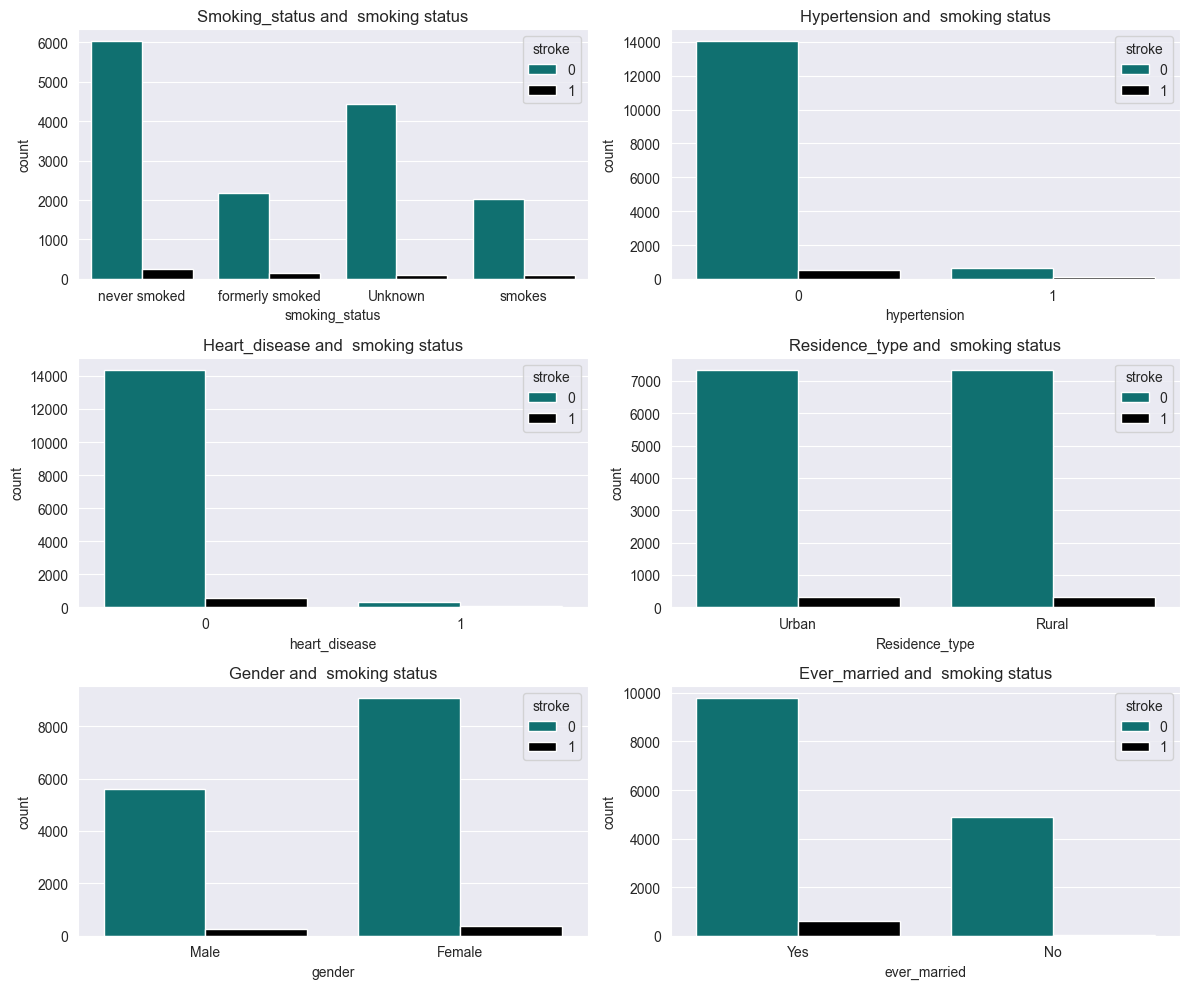

In [23]:
x_values = ['smoking_status','hypertension','heart_disease','Residence_type','gender','ever_married']
fig, axis = plt.subplots(nrows = 3, ncols = 2, figsize=(12,10))
for ax, x_values in zip(axis.flat, x_values):
    sns.countplot(data=train_df, x= x_values, hue= 'stroke', ax= ax)
    ax.set_title(f'{x_values.capitalize()} and  smoking status')
plt.tight_layout()
plt.show()


In [24]:
# Data Preparationa nd preprocessing
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn import set_config
set_config(display='diagram')

In [25]:
train_df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [26]:
input_columns = list(train_df.columns)[1:-1]

In [27]:
traget_column = 'stroke'

In [28]:
train_input = train_df[input_columns].copy()
train_target = train_df[traget_column].copy()
test_input = test_df[input_columns].copy()

In [29]:
numerical_columns = train_input.select_dtypes(include=np.number).columns.to_list()
numerical_columns

['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']

In [30]:
categorical_cols = train_input.select_dtypes(include='object').columns.to_list()

In [31]:
categorical_cols.remove('smoking_status')

In [32]:
train_df['smoking_status'].unique()

array(['never smoked', 'formerly smoked', 'Unknown', 'smokes'],
      dtype=object)

In [33]:
ordinal_enc = OrdinalEncoder(categories=[['Unknown','never smoked', 'formerly smoked','smokes']])

In [34]:
onehot_enc = OneHotEncoder(handle_unknown='ignore')

In [35]:
preprocessor = ColumnTransformer([
    ('Ordinal_Encode', ordinal_enc,['smoking_status']), 
    ('OneHot_Encode', onehot_enc,categorical_cols)
]
)

In [36]:
preprocessor.fit(train_input)

ColumnTransformer(transformers=[('Ordinal_Encode',
                                 OrdinalEncoder(categories=[['Unknown',
                                                             'never smoked',
                                                             'formerly smoked',
                                                             'smokes']]),
                                 ['smoking_status']),
                                ('OneHot_Encode',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['gender', 'ever_married', 'work_type',
                                  'Residence_type'])])

In [37]:
ColumnTransformer(transformers=[('Ordinal_Encode',
                                 OrdinalEncoder(categories=[['Unknown',
                                                             'never smoked',
                                                             'formerly smoked',
                                                             'smokes']]),
                                 ['smoking_status']),
                                ('OneHot_Encode',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['gender', 'ever_married', 'work_type',
                                  'Residence_type'])])

ColumnTransformer(transformers=[('Ordinal_Encode',
                                 OrdinalEncoder(categories=[['Unknown',
                                                             'never smoked',
                                                             'formerly smoked',
                                                             'smokes']]),
                                 ['smoking_status']),
                                ('OneHot_Encode',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['gender', 'ever_married', 'work_type',
                                  'Residence_type'])])

In [38]:
encoded_col = list(preprocessor.get_feature_names_out())

In [39]:
encoded_col

['Ordinal_Encode__smoking_status',
 'OneHot_Encode__gender_Female',
 'OneHot_Encode__gender_Male',
 'OneHot_Encode__ever_married_No',
 'OneHot_Encode__ever_married_Yes',
 'OneHot_Encode__work_type_Govt_job',
 'OneHot_Encode__work_type_Never_worked',
 'OneHot_Encode__work_type_Private',
 'OneHot_Encode__work_type_Self-employed',
 'OneHot_Encode__work_type_children',
 'OneHot_Encode__Residence_type_Rural',
 'OneHot_Encode__Residence_type_Urban']

In [40]:
train_input[encoded_col] = preprocessor.transform(train_input)
test_input[encoded_col] = preprocessor.transform(test_input)

In [41]:
x_train = train_input[numerical_columns + encoded_col]
y_train = train_df[traget_column]
x_test = test_input[numerical_columns + encoded_col]

In [42]:
x_train.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,Ordinal_Encode__smoking_status,OneHot_Encode__gender_Female,OneHot_Encode__gender_Male,OneHot_Encode__ever_married_No,OneHot_Encode__ever_married_Yes,OneHot_Encode__work_type_Govt_job,OneHot_Encode__work_type_Never_worked,OneHot_Encode__work_type_Private,OneHot_Encode__work_type_Self-employed,OneHot_Encode__work_type_children,OneHot_Encode__Residence_type_Rural,OneHot_Encode__Residence_type_Urban
0,28.0,0,0,79.53,31.1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,33.0,0,0,78.44,23.9,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,42.0,0,0,103.00,40.3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,56.0,0,0,64.87,28.8,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,24.0,0,0,73.36,28.8,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [43]:
x_train.shape[1] == x_test.shape[1]

True

In [44]:
# Splitting the ddata ino train and test
from sklearn.model_selection import train_test_split


In [45]:
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,test_size=0.2, random_state=42)

In [46]:
x_train.shape

(12242, 17)

In [47]:
# Baseline model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [48]:
models = [
    (LogisticRegression(), 'LogisticRegression'),
    (RandomForestClassifier(),'RandomForestClassifier'),
    (XGBClassifier(), 'XGBClassifier'),
    (LGBMClassifier(verbose = 1),'LGBMClassifier')
]

In [49]:
def evaluate_model(model, x_train,y_train,x_val,y_val):
    y_pred = model.predict(x_val)
    Confusion_mat = confusion_matrix(y_val,y_pred)
    accuracy = accuracy_score(y_val,y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    return Confusion_mat, accuracy, precision, recall, f1

In [50]:
confusion_mats = {}
def metric_df(model, model_name):
    Confusion_mat, *df = evaluate_model(model,x_train,y_train,x_val,y_val)
    confusion_mats[model_name] = Confusion_mat
    df = [df]
    model_metrics = pd.DataFrame(data=df,columns=['Accuracy','Precision','Recall','F1',])
    model_metrics.insert(0,'Model', model_name)
    return model_metrics

In [51]:
predictions = []
for model, model_name in models:
    model.fit(x_train, y_train)
    model_metrics = metric_df(model, model_name)
    predictions.append(model_metrics)

c:\Users\RAVI PATHAK\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[LightGBM] [Info] Number of positive: 498, number of negative: 11744
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002631 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 623
[LightGBM] [Info] Number of data points in the train set: 12242, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.040680 -> initscore=-3.160498
[LightGBM] [Info] Start training from score -3.160498


In [52]:
predictions

[                Model  Accuracy  Precision    Recall        F1
 0  LogisticRegression   0.95459   0.307692  0.029851  0.054422,
                     Model  Accuracy  Precision    Recall        F1
 0  RandomForestClassifier   0.95361   0.277778  0.037313  0.065789,
            Model  Accuracy  Precision    Recall        F1
 0  XGBClassifier   0.95361   0.388889  0.104478  0.164706,
             Model  Accuracy  Precision    Recall        F1
 0  LGBMClassifier   0.95459   0.380952  0.059701  0.103226]

In [53]:
over_sample = SMOTE()
x_train_ns, y_train_ns = over_sample.fit_resample(x_train,y_train)

In [54]:
x_train_ns.shape

(23488, 17)

In [55]:
lr_with_smote = LogisticRegression()
lr_with_smote.fit(x_train_ns, y_train_ns)
lr_with_smote_mat = metric_df(lr_with_smote,'Logistic with SMOTE')
predictions.append(lr_with_smote_mat)

c:\Users\RAVI PATHAK\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [56]:
for model_name, confusion_mat in confusion_mats.items():
    print(f'Confusion Matrix for {model_name}')
    print(confusion_mat)

Confusion Matrix for LogisticRegression
[[2918    9]
 [ 130    4]]
Confusion Matrix for RandomForestClassifier
[[2914   13]
 [ 129    5]]
Confusion Matrix for XGBClassifier
[[2905   22]
 [ 120   14]]
Confusion Matrix for LGBMClassifier
[[2914   13]
 [ 126    8]]
Confusion Matrix for Logistic with SMOTE
[[2305  622]
 [  29  105]]


In [57]:
# Voting Classifier Hard and soft
from sklearn.ensemble import VotingClassifier

In [58]:
estimator = []
estimator.append(('LogisticRegression', LogisticRegression())), 
estimator.append(('RandomForestClassifier', RandomForestClassifier())), 
estimator.append(('XGBClassifier', XGBClassifier())), 
estimator.append(('LightGBM', LGBMClassifier(verbose = 1)))


In [59]:
vc_hard = VotingClassifier(estimators=estimator, voting='hard')
vc_hard.fit(x_train,y_train)
vc_hard_mat = metric_df(vc_hard, 'vc_hard')
predictions.append(vc_hard_mat)

c:\Users\RAVI PATHAK\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[LightGBM] [Info] Number of positive: 498, number of negative: 11744
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000302 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 623
[LightGBM] [Info] Number of data points in the train set: 12242, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.040680 -> initscore=-3.160498
[LightGBM] [Info] Start training from score -3.160498


In [60]:
vc_hard_mat

,Model,Accuracy,Precision,Recall,F1
0,vc_hard,0.955897,0.444444,0.029851,0.055944


In [61]:
vc_soft = VotingClassifier(estimators=estimator, voting='soft')
vc_soft.fit(x_train,y_train)
vc_soft_mat = metric_df(vc_soft, 'vc_hard')
predictions.append(vc_soft_mat)

c:\Users\RAVI PATHAK\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[LightGBM] [Info] Number of positive: 498, number of negative: 11744
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000453 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 623
[LightGBM] [Info] Number of data points in the train set: 12242, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.040680 -> initscore=-3.160498
[LightGBM] [Info] Start training from score -3.160498


In [62]:
vc_soft_mat

,Model,Accuracy,Precision,Recall,F1
0,vc_hard,0.95655,0.533333,0.059701,0.107383


In [63]:
prediction_base = pd.concat(predictions,ignore_index=True,sort=False)
prediction_base.sort_values(by=['Recall'], ascending=False).style.hide(axis='index')

Model,Accuracy,Precision,Recall,F1
Logistic with SMOTE,0.787324,0.144429,0.783582,0.243902
XGBClassifier,0.953610,0.388889,0.104478,0.164706
LGBMClassifier,0.954590,0.380952,0.059701,0.103226
vc_hard,0.956550,0.533333,0.059701,0.107383
RandomForestClassifier,0.953610,0.277778,0.037313,0.065789
LogisticRegression,0.954590,0.307692,0.029851,0.054422
vc_hard,0.955897,0.444444,0.029851,0.055944


In [64]:
models_to_plot = [
    'LogisticRegression', 
    'RandomForestClassifier', 
    'XGBClassifier', 
    'Logistic with SMOTE'
]

In [1]:
fig, axes = plt.subplots(nrows = 2, ncols =2, figsize = (9, 7))
for ax, model_name in zip(axes.ravel(), models_to_plot):
    confusion_mat = confusion_mats[model_name]
    sns.heatmap(confusion_mat, annot=True, fmt='d', cmap = 'Blues', ax = ax)
    ax.set_title(f'{model_name}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

# plt.tight_layout()
plt.subplots_adjust(left=0, right = 0.9, top =0.9, bottom = 0)
plt.show()

NameError: name 'plt' is not defined

In [66]:
# AUC - ROC Curve Homework ->
from sklearn.metrics import roc_auc_score, roc_curve, auc
# Precision - recall curve
from sklearn.metrics import PredictionErrorDisplay

In [67]:
#Retrain & Save Model
X_train = train_input[numerical_columns + encoded_col]
y_train = train_df[traget_column]

In [68]:
preds = lr_with_smote.predict(x_test)
preds

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [69]:
sub_df = preds

In [70]:
pd.DataFrame(sub_df).to_csv("submission.csv", index=None)

In [71]:
sub_df = pd.read_csv("submission.csv")

In [72]:
sub_df.head()

,0
0,0
1,1
2,0
3,1
4,0


In [73]:
# Make Prediction on a single input

sub_df['stroke'] = preds

In [74]:
sub_df

,0,stroke
0,0,0
1,1,1
2,0,0
3,1,1
4,0,0
...,...,...
10198,0,0
10199,0,0
10200,0,0
10201,0,0


In [75]:
train_df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [76]:
single_input = {
    'gender': 'Male', 
    'age': 33, 
    'hypertension':0,
    'heart_disease': 0, 
    'ever_married':'Yes',
    'work_type':'Private',
    'Residence_type':'Urban',
    'avg_glucose_level':79.53,
    'bmi': 31.10,
    'smoking_status': 'formerly smoked'
}

In [77]:
input_df = pd.DataFrame([single_input])

In [78]:
input_df[encoded_col] = preprocessor.transform(input_df)

In [79]:
X = input_df[numerical_columns + encoded_col]

In [80]:
lr_with_smote.predict(X)

array([0], dtype=int64)

In [81]:
import joblib

In [82]:
model = {
    'encoded_cols': encoded_col, 
    'numeric_cols':numerical_columns, 
    'preprocessor': preprocessor, 
    'model': lr_with_smote
}

In [83]:
joblib.dump(model, 'model.joblib1')

['model.joblib1']